# Questionnaire Analysis

16 Participants performed a mission specification using a top-down and bottom-up approach. Participants were equally divided into two groups:

- Group 1 started with a top-down approach and then performed the bottom-up approach;
- Group 2 started with the bottom-up and then performed the top-down approach.

Our analysis consists of two test:

- Wilcoxon Signed-Rank Test:
    For each group, how do results differ based on performing the task with a bottom-up or top-down specification? We perform this analysis for each question seperately

- Wilcoxon Rank-Sum Test:
    Did the order of the approaches impact the test? We perform the rank-sum test on the score differences between groups to see if performing a top-down or bottom-up specification first impacted the results.


*Results are significant for a p value < 0.05*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

/home/v/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
bottom_up = pd.read_csv("bottom_up.csv")
bottom_up["Specification"] = "bottom-up"
bottom_up

,ID2,Group,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Specification
0,G402,1,5,6,5,6,4,4,5,6,bottom-up
1,G404,1,6,6,6,6,5,7,5,7,bottom-up
2,G403,1,6,5,6,4,5,4,3,5,bottom-up
3,G203,1,4,4,4,5,3,2,4,4,bottom-up
4,G401,1,2,6,6,6,6,3,4,5,bottom-up
5,G201,1,3,2,6,4,2,4,4,7,bottom-up
6,G202,1,2,1,2,2,3,1,2,3,bottom-up
7,G204,1,4,6,4,3,4,3,4,4,bottom-up
8,G102,2,6,4,6,7,3,2,2,6,bottom-up
9,G104,2,1,4,4,3,2,2,4,4,bottom-up


In [3]:
top_down = pd.read_csv("top_down.csv")
top_down["Specification"] = "top-down"
top_down

,ID2,Group,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Specification
0,G201,1,1,2,4,3,1,4,4,6,top-down
1,G403,1,3,3,3,5,2,3,4,6,top-down
2,G202,1,7,7,7,6,2,6,6,6,top-down
3,G204,1,3,3,4,5,5,4,6,6,top-down
4,G401,1,2,2,2,4,2,1,4,2,top-down
5,G203,1,5,5,5,4,4,2,4,4,top-down
6,G404,1,2,3,6,6,3,5,4,3,top-down
7,G402,1,5,2,3,5,3,2,4,6,top-down
8,G303,2,3,3,3,6,3,2,4,5,top-down
9,G103,2,2,2,5,7,1,5,5,6,top-down


In [4]:
df = pd.concat([top_down, bottom_up])
df["Q2_Q3"] = df[["Q2", "Q3"]].mean(axis=1)
df.drop(["Q2", "Q3"], axis=1, inplace=True)
df["Q6_Q7"] = df[["Q6", "Q7"]].mean(axis=1)
df.drop(["Q6", "Q7"], axis=1, inplace=True)
df = df.melt(id_vars=["ID2", "Group", "Specification"], var_name="Question", value_name="Answer")
df

,ID2,Group,Specification,Question,Answer
0,G201,1,top-down,Q1,1.0
1,G403,1,top-down,Q1,3.0
2,G202,1,top-down,Q1,7.0
3,G204,1,top-down,Q1,3.0
4,G401,1,top-down,Q1,2.0
...,...,...,...,...,...
187,G301,2,bottom-up,Q6_Q7,6.5
188,G304,2,bottom-up,Q6_Q7,3.5
189,G103,2,bottom-up,Q6_Q7,6.5
190,G303,2,bottom-up,Q6_Q7,5.5


<Axes: xlabel='Answer', ylabel='Intent'>

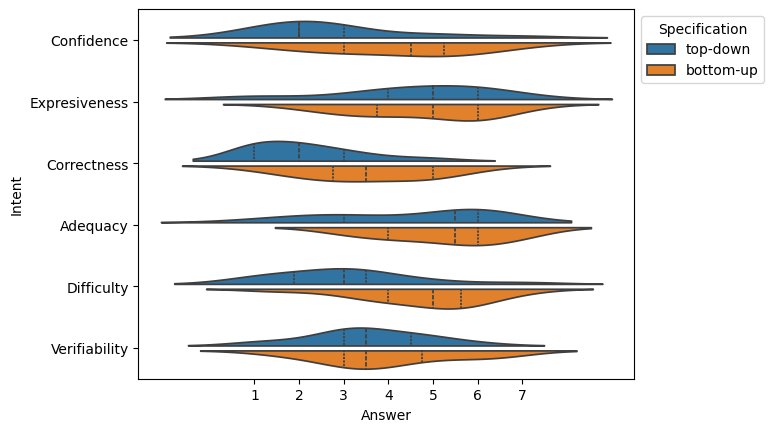

In [5]:
p = sns.violinplot(data=df, x="Answer", y="Question", hue="Specification", gap=0.2, split=True, inner="quart")
p.set_xticks(range(1,8))
p.set_ylabel("Intent")
p.set_yticks(range(6))
p.set_yticklabels(["Confidence", "Expresiveness", "Correctness", "Adequacy", "Difficulty", "Verifiability"])
sns.move_legend(p, "upper left", bbox_to_anchor=(1, 1))
fig = p.get_figure()
fig.savefig("quest_violinplot.pdf", bbox_inches="tight")
p

## Wilcoxon Signed-Rank Test

Gauging preferences for each question

## Question 1 - Confidence

Q1.After studying the tutorials and initial clarifications from the instructors, the features for modeling missions using a goal-oriented approach with X became clear to me.

In [6]:
# Did participants prefer bottom-up or top-down?

q1_bottomup = bottom_up["Q1"]
q1_topdown = top_down["Q1"]
stats.wilcoxon(q1_bottomup, q1_topdown)

WilcoxonResult(statistic=np.float64(14.0), pvalue=np.float64(0.0148936912492968))

- Statistically significant

## Question 2 & 3 - Difficulty

Q2. Modeling missions using a top-down/bottom-up approach such as X is easy.

In [7]:
bottom_up["Q2_Q3"] = bottom_up[["Q2", "Q3"]].mean(axis=1)
bottom_up["Q6_Q7"] = bottom_up[["Q6", "Q7"]].mean(axis=1)

top_down["Q2_Q3"] = top_down[["Q2", "Q3"]].mean(axis=1)
top_down["Q6_Q7"] = top_down[["Q6", "Q7"]].mean(axis=1)

In [8]:
# Did participants prefer bottom-up or top-down?


q2_bottomup = bottom_up["Q2_Q3"]
q2_topdown = top_down["Q2_Q3"]
stats.wilcoxon(q2_bottomup, q2_topdown)

WilcoxonResult(statistic=np.float64(19.0), pvalue=np.float64(0.011122511741423853))

- Statistically significant

## Question 4 - Expressiveness

Q4.X provides features that allow me to express the requirements of the mission I specified.

In [9]:
# Did participants prefer bottom-up or top-down?

q4_bottomup = bottom_up["Q4"]
q4_topdown = top_down["Q4"]
stats.wilcoxon(q4_bottomup, q4_topdown)

WilcoxonResult(statistic=np.float64(43.0), pvalue=np.float64(0.8605010842117772))

- Not statistically significant

## Question 5 - Correctness

Q5. I am certain that my requirements specification for the robotic mission is correct.

In [10]:
# Did participants prefer bottom-up or top-down?

q5_bottomup = bottom_up["Q5"]
q5_topdown = top_down["Q5"]
stats.wilcoxon(q5_bottomup, q5_topdown)

WilcoxonResult(statistic=np.float64(11.0), pvalue=np.float64(0.014893554419997844))

- Statistically significant

## Question 6 and 7 - Verifiability

Q6. The automatic feedback of X was useful for fixing errors during the mission specification.

In [11]:
# Did participants prefer bottom-up or top-down?

q6_bottomup = bottom_up["Q6_Q7"]
q6_topdown = top_down["Q6_Q7"]
stats.wilcoxon(q6_bottomup, q6_topdown)

WilcoxonResult(statistic=np.float64(50.5), pvalue=np.float64(0.36382755490285634))

- Not Statistically Significant

## Question 8 - Adequacy

Q8. Modelling missions on X allows me to specify mission requirements from a higher level perspective and abstract away low-level details of robotic implementations.

In [12]:
# Did participants prefer bottom-up or top-down?

q8_bottomup = bottom_up["Q8"]
q8_topdown = top_down["Q8"]
stats.wilcoxon(q8_bottomup, q8_topdown)

WilcoxonResult(statistic=np.float64(33.0), pvalue=np.float64(0.21689273952339705))

- Not Statistically Significant

In [13]:
_, q1_p = stats.wilcoxon(q1_bottomup, q1_topdown)
_, q2_p = stats.wilcoxon(q2_bottomup, q2_topdown)
_, q4_p = stats.wilcoxon(q4_bottomup, q4_topdown)
_, q5_p = stats.wilcoxon(q5_bottomup, q5_topdown)
_, q6_p = stats.wilcoxon(q6_bottomup, q6_topdown)
_, q8_p = stats.wilcoxon(q8_bottomup, q8_topdown)

signedrank_pvalues = [q1_p, q2_p, q4_p, q5_p, q6_p, q8_p]
questions = [f"Q{i}" for i in range(1, len(signedrank_pvalues)+1)]

signedrank_dic = {"Pvalues": signedrank_pvalues, "Questions": questions}
signedrank_df = pd.DataFrame(signedrank_dic)
signedrank_df

,Pvalues,Questions
0,0.014894,Q1
1,0.011123,Q2
2,0.860501,Q3
3,0.014894,Q4
4,0.363828,Q5
5,0.216893,Q6


<Axes: xlabel='Questions', ylabel='Pvalues'>

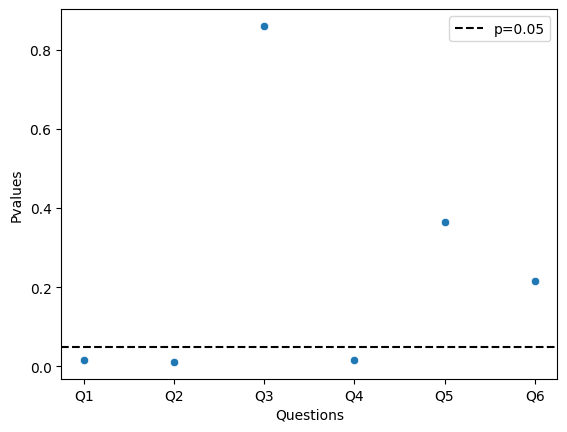

In [14]:
plt.axhline(y=0.05, linestyle='--', color="black", label="p=0.05")
sns.scatterplot(data=signedrank_df, x="Questions", y="Pvalues")

## Conclusion

- Questions Q1, Q2, Q3, Q5 were statistically significant
- Q4, Q6, Q7 and Q8 were not statistically significant

# Wilcoxon Rank-Sum Test

Gauging if the order of tasks was siginificant for the test

In [15]:
q1_group1_bottomup = bottom_up[bottom_up["Group"] == 1]["Q1"]
q1_group1_topdown = top_down[top_down["Group"] == 1]["Q1"]
q2_group1_bottomup = bottom_up[bottom_up["Group"] == 1]["Q2"]
q2_group1_topdown = top_down[top_down["Group"] == 1]["Q2"]
q3_group1_bottomup = bottom_up[bottom_up["Group"] == 1]["Q3"]
q3_group1_topdown = top_down[top_down["Group"] == 1]["Q3"]
q4_group1_bottomup = bottom_up[bottom_up["Group"] == 1]["Q4"]
q4_group1_topdown = top_down[top_down["Group"] == 1]["Q4"]
q5_group1_bottomup = bottom_up[bottom_up["Group"] == 1]["Q5"]
q5_group1_topdown = top_down[top_down["Group"] == 1]["Q5"]
q6_group1_bottomup = bottom_up[bottom_up["Group"] == 1]["Q6"]
q6_group1_topdown = top_down[top_down["Group"] == 1]["Q6"]
q7_group1_bottomup = bottom_up[bottom_up["Group"] == 1]["Q7"]
q7_group1_topdown = top_down[top_down["Group"] == 1]["Q7"]
q8_group1_bottomup = bottom_up[bottom_up["Group"] == 1]["Q8"]
q8_group1_topdown = top_down[top_down["Group"] == 1]["Q8"]

q1_group2_bottomup = bottom_up[bottom_up["Group"] == 2]["Q1"]
q1_group2_topdown = top_down[top_down["Group"] == 2]["Q1"]
q2_group2_bottomup = bottom_up[bottom_up["Group"] == 2]["Q2"]
q2_group2_topdown = top_down[top_down["Group"] == 2]["Q2"]
q3_group2_bottomup = bottom_up[bottom_up["Group"] == 2]["Q3"]
q3_group2_topdown = top_down[top_down["Group"] == 2]["Q3"]
q4_group2_bottomup = bottom_up[bottom_up["Group"] == 2]["Q4"]
q4_group2_topdown = top_down[top_down["Group"] == 2]["Q4"]
q5_group2_bottomup = bottom_up[bottom_up["Group"] == 2]["Q5"]
q5_group2_topdown = top_down[top_down["Group"] == 2]["Q5"]
q6_group2_bottomup = bottom_up[bottom_up["Group"] == 2]["Q6"]
q6_group2_topdown = top_down[top_down["Group"] == 2]["Q6"]
q7_group2_bottomup = bottom_up[bottom_up["Group"] == 2]["Q7"]
q7_group2_topdown = top_down[top_down["Group"] == 2]["Q7"]
q8_group2_bottomup = bottom_up[bottom_up["Group"] == 2]["Q8"]
q8_group2_topdown = top_down[top_down["Group"] == 2]["Q8"]

## Question 1

Q1.After studying the tutorials and initial clarifications from the instructors, the features for modeling missions using a goal-oriented approach with X became clear to me.

In [16]:
# Did the order impact the groups?

q1_group1_diff = q1_group1_bottomup - q1_group1_topdown
q1_group2_diff = q1_group2_bottomup - q1_group2_topdown

stats.mannwhitneyu(q1_group1_diff, q1_group2_diff, alternative="two-sided")

MannwhitneyuResult(statistic=np.float64(16.5), pvalue=np.float64(0.11008852322972595))

- The test showed the order has no significant impact in Q1

## Question 2

In [17]:
# Did the order impact the groups?

q2_group1_diff = q2_group1_bottomup - q2_group1_topdown
q2_group2_diff = q2_group2_bottomup - q2_group2_topdown

stats.mannwhitneyu(q2_group1_diff, q2_group2_diff, alternative="two-sided")

MannwhitneyuResult(statistic=np.float64(22.0), pvalue=np.float64(0.3119338839077299))

- The test showed the order has no significant impact in Q2

## Question 3

In [18]:
# Did the order impact the groups?

q3_group1_diff = q3_group1_bottomup - q3_group1_topdown
q3_group2_diff = q3_group2_bottomup - q3_group2_topdown

stats.mannwhitneyu(q3_group1_diff, q3_group2_diff, alternative="two-sided")

MannwhitneyuResult(statistic=np.float64(18.0), pvalue=np.float64(0.14546383348396352))

- The test showed the order has no significant impact in Q3

## Question 4

In [19]:
# Did the order impact the groups?

q4_group1_diff = q4_group1_bottomup - q4_group1_topdown
q4_group2_diff = q4_group2_bottomup - q4_group2_topdown

stats.mannwhitneyu(q4_group1_diff, q4_group2_diff, alternative="two-sided")

MannwhitneyuResult(statistic=np.float64(25.5), pvalue=np.float64(0.5249324323264364))

- The test showed the order has no significant impact in Q4

## Question 5

In [20]:
# Did the order impact the groups?

q5_group1_diff = q5_group1_bottomup - q5_group1_topdown
q5_group2_diff = q5_group2_bottomup - q5_group2_topdown

stats.mannwhitneyu(q5_group1_diff, q5_group2_diff, alternative="two-sided")

MannwhitneyuResult(statistic=np.float64(30.0), pvalue=np.float64(0.8714045322237178))

- The test showed the order has no significant impact in Q5

## Question 6

In [21]:
# Did the order impact the groups?

q6_group1_diff = q6_group1_bottomup - q6_group1_topdown
q6_group2_diff = q6_group2_bottomup - q6_group2_topdown

stats.mannwhitneyu(q6_group1_diff, q6_group2_diff, alternative="two-sided")

MannwhitneyuResult(statistic=np.float64(20.5), pvalue=np.float64(0.24520008673249938))

- The test showed the order has no significant impact in Q6

## Question 7

In [22]:
# Did the order impact the groups?

q7_group1_diff = q7_group1_bottomup - q7_group1_topdown
q7_group2_diff = q7_group2_bottomup - q7_group2_topdown

stats.mannwhitneyu(q7_group1_diff, q7_group2_diff, alternative="two-sided")

MannwhitneyuResult(statistic=np.float64(22.5), pvalue=np.float64(0.33366648508297103))

- The test showed the order has no significant impact in Q7

## Question 8

In [23]:
# Did the order impact the groups?

q8_group1_diff = q8_group1_bottomup - q8_group1_topdown
q8_group2_diff = q8_group2_bottomup - q8_group2_topdown

stats.mannwhitneyu(q8_group1_diff, q8_group2_diff, alternative="two-sided")

MannwhitneyuResult(statistic=np.float64(25.0), pvalue=np.float64(0.48902848314740066))

- The test showed the order has no significant impact in Q8

<Axes: xlabel='Questions', ylabel='p-values'>

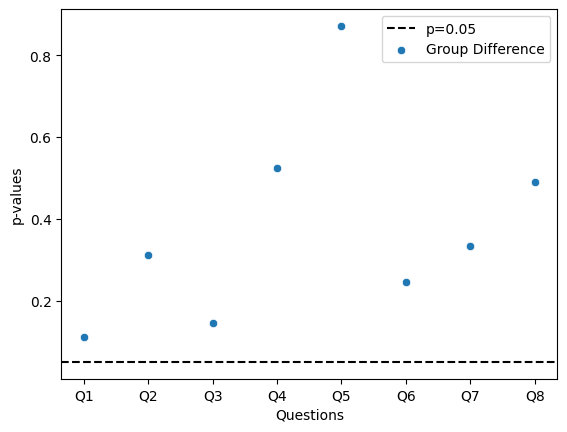

In [24]:
_, q1_ranksum = stats.mannwhitneyu(q1_group1_diff, q1_group2_diff, alternative="two-sided")
_, q2_ranksum = stats.mannwhitneyu(q2_group1_diff, q2_group2_diff, alternative="two-sided")
_, q3_ranksum = stats.mannwhitneyu(q3_group1_diff, q3_group2_diff, alternative="two-sided")
_, q4_ranksum = stats.mannwhitneyu(q4_group1_diff, q4_group2_diff, alternative="two-sided")
_, q5_ranksum = stats.mannwhitneyu(q5_group1_diff, q5_group2_diff, alternative="two-sided")
_, q6_ranksum = stats.mannwhitneyu(q6_group1_diff, q6_group2_diff, alternative="two-sided")
_, q7_ranksum = stats.mannwhitneyu(q7_group1_diff, q7_group2_diff, alternative="two-sided")
_, q8_ranksum = stats.mannwhitneyu(q8_group1_diff, q8_group2_diff, alternative="two-sided")

questions = [f"Q{i}" for i in range(1, 9)]
ranksum_pvalues = [q1_ranksum, q2_ranksum, q3_ranksum, q4_ranksum, q5_ranksum, q6_ranksum, q7_ranksum, q8_ranksum]
ranksum_df = pd.DataFrame({"Questions": questions, "p-values": ranksum_pvalues})

plt.axhline(y=0.05, linestyle='--', color="black", label="p=0.05")
sns.scatterplot(data=ranksum_df, x="Questions", y="p-values", label="Group Difference")

## Conclusion

None of the questions were significantly impacted by which approach was used first.

## Wilcoxon one-sample test

### Calculate Effect for each group with hypothesis: µ ≥ 0

#### Q1

In [25]:
w_q1_group1_bottomup, p = stats.wilcoxon(q1_group1_bottomup - 4)
w_q1_group1_topdown, p_val = stats.wilcoxon(q1_group1_topdown - 4)
w_q1_group2_bottomup, p_val = stats.wilcoxon(q1_group2_bottomup - 4)
w_q1_group2_topdown, p_val = stats.wilcoxon(q1_group2_topdown - 4)

effect_q1_group1_bottomup = w_q1_group1_bottomup/np.sqrt(q1_group1_bottomup.size)
effect_q1_group1_topdown = w_q1_group1_topdown/np.sqrt(q1_group1_topdown.size)
effect_q1_group2_bottomup = w_q1_group2_bottomup/np.sqrt(q1_group2_bottomup.size)
effect_q1_group2_topdown = w_q1_group2_topdown/np.sqrt(q1_group2_topdown.size)

print(f'Q1 Group1 Bottom Up:{effect_q1_group1_bottomup}, Top Down:{effect_q1_group1_topdown}')
print(f'Q1 Group2 Bottom Up:{effect_q1_group2_bottomup}, Top Down:{effect_q1_group2_topdown}')

Q1 Group1 Bottom Up:3.7123106012293743, Top Down:4.419417382415921
Q1 Group2 Bottom Up:4.772970773009195, Top Down:0.0


#### Q2

In [26]:
w_q2_group1_bottomup, p = stats.wilcoxon(q2_group1_bottomup - 4)
w_q2_group1_topdown, p_val = stats.wilcoxon(q2_group1_topdown - 4)
w_q2_group2_bottomup, p_val = stats.wilcoxon(q2_group2_bottomup - 4)
w_q2_group2_topdown, p_val = stats.wilcoxon(q2_group2_topdown - 4)

effect_q2_group1_bottomup = w_q2_group1_bottomup/np.sqrt(q2_group1_bottomup.size)
effect_q2_group1_topdown = w_q2_group1_topdown/np.sqrt(q2_group1_topdown.size)
effect_q2_group2_bottomup = w_q2_group2_bottomup/np.sqrt(q2_group2_bottomup.size)
effect_q2_group2_topdown = w_q2_group2_topdown/np.sqrt(q2_group2_topdown.size)

print(f'Q2 Group1 Bottom Up:{effect_q2_group1_bottomup}, Top Down:{effect_q2_group1_topdown}')
print(f'Q2 Group2 Bottom Up:{effect_q2_group2_bottomup}, Top Down:{effect_q2_group2_topdown}')

Q2 Group1 Bottom Up:3.8890872965260113, Top Down:3.7123106012293743
Q2 Group2 Bottom Up:1.9445436482630056, Top Down:0.0


#### Q3

In [27]:
w_q3_group1_bottomup, p = stats.wilcoxon(q3_group1_bottomup - 4)
w_q3_group1_topdown, p_val = stats.wilcoxon(q3_group1_topdown - 4)
w_q3_group2_bottomup, p_val = stats.wilcoxon(q3_group2_bottomup - 4)
w_q3_group2_topdown, p_val = stats.wilcoxon(q3_group2_topdown - 4)

effect_q3_group1_bottomup = w_q3_group1_bottomup/np.sqrt(q3_group1_bottomup.size)
effect_q3_group1_topdown = w_q3_group1_topdown/np.sqrt(q3_group1_topdown.size)
effect_q3_group2_bottomup = w_q3_group2_bottomup/np.sqrt(q3_group2_bottomup.size)
effect_q3_group2_topdown = w_q3_group2_topdown/np.sqrt(q3_group2_topdown.size)

print(f'Q3 Group1 Bottom Up:{effect_q3_group1_bottomup}, Top Down:{effect_q3_group1_topdown}')
print(f'Q3 Group2 Bottom Up:{effect_q3_group2_bottomup}, Top Down:{effect_q3_group2_topdown}')

Q3 Group1 Bottom Up:1.414213562373095, Top Down:3.005203820042827
Q3 Group2 Bottom Up:0.5303300858899106, Top Down:1.7677669529663687


#### Q4

In [28]:
w_q4_group1_bottomup, p = stats.wilcoxon(q4_group1_bottomup - 4)
w_q4_group1_topdown, p_val = stats.wilcoxon(q4_group1_topdown - 4)
w_q4_group2_bottomup, p_val = stats.wilcoxon(q4_group2_bottomup - 4)
w_q4_group2_topdown, p_val = stats.wilcoxon(q4_group2_topdown - 4)

effect_q4_group1_bottomup = w_q4_group1_bottomup/np.sqrt(q4_group1_bottomup.size)
effect_q4_group1_topdown = w_q4_group1_topdown/np.sqrt(q4_group1_topdown.size)
effect_q4_group2_bottomup = w_q4_group2_bottomup/np.sqrt(q4_group2_bottomup.size)
effect_q4_group2_topdown = w_q4_group2_topdown/np.sqrt(q4_group2_topdown.size)

print(f'Q4 Group1 Bottom Up:{effect_q4_group1_bottomup}, Top Down:{effect_q4_group1_topdown}')
print(f'Q4 Group2 Bottom Up:{effect_q4_group2_bottomup}, Top Down:{effect_q4_group2_topdown}')

Q4 Group1 Bottom Up:2.1213203435596424, Top Down:0.8838834764831843
Q4 Group2 Bottom Up:1.414213562373095, Top Down:3.5355339059327373


#### Q5

In [29]:
w_q5_group1_bottomup, p = stats.wilcoxon(q5_group1_bottomup - 4)
w_q5_group1_topdown, p_val = stats.wilcoxon(q5_group1_topdown - 4)
w_q5_group2_bottomup, p_val = stats.wilcoxon(q5_group2_bottomup - 4)
w_q5_group2_topdown, p_val = stats.wilcoxon(q5_group2_topdown - 4)

effect_q5_group1_bottomup = w_q5_group1_bottomup/np.sqrt(q5_group1_bottomup.size)
effect_q5_group1_topdown = w_q5_group1_topdown/np.sqrt(q5_group1_topdown.size)
effect_q5_group2_bottomup = w_q5_group2_bottomup/np.sqrt(q5_group2_bottomup.size)
effect_q5_group2_topdown = w_q5_group2_topdown/np.sqrt(q5_group2_topdown.size)

print(f'Q5 Group1 Bottom Up:{effect_q5_group1_bottomup}, Top Down:{effect_q5_group1_topdown}')
print(f'Q5 Group2 Bottom Up:{effect_q5_group2_bottomup}, Top Down:{effect_q5_group2_topdown}')

Q5 Group1 Bottom Up:3.7123106012293743, Top Down:0.7071067811865475
Q5 Group2 Bottom Up:1.7677669529663687, Top Down:0.0


#### Q6

In [30]:
w_q6_group1_bottomup, p = stats.wilcoxon(q6_group1_bottomup - 4)
w_q6_group1_topdown, p_val = stats.wilcoxon(q6_group1_topdown - 4)
w_q6_group2_bottomup, p_val = stats.wilcoxon(q6_group2_bottomup - 4)
w_q6_group2_topdown, p_val = stats.wilcoxon(q6_group2_topdown - 4)

effect_q6_group1_bottomup = w_q6_group1_bottomup/np.sqrt(q6_group1_bottomup.size)
effect_q6_group1_topdown = w_q6_group1_topdown/np.sqrt(q6_group1_topdown.size)
effect_q6_group2_bottomup = w_q6_group2_bottomup/np.sqrt(q6_group2_bottomup.size)
effect_q6_group2_topdown = w_q6_group2_topdown/np.sqrt(q6_group2_topdown.size)

print(f'Q6 Group1 Bottom Up:{effect_q6_group1_bottomup}, Top Down:{effect_q6_group1_topdown}')
print(f'Q6 Group2 Bottom Up:{effect_q6_group2_bottomup}, Top Down:{effect_q6_group2_topdown}')

Q6 Group1 Bottom Up:1.590990257669732, Top Down:1.9445436482630056
Q6 Group2 Bottom Up:2.651650429449553, Top Down:1.0606601717798212


#### Q7

In [31]:
w_q7_group1_bottomup, p = stats.wilcoxon(q7_group1_bottomup - 4)
w_q7_group1_topdown, p_val = stats.wilcoxon(q7_group1_topdown - 4)
w_q7_group2_bottomup, p_val = stats.wilcoxon(q7_group2_bottomup - 4)
w_q7_group2_topdown, p_val = stats.wilcoxon(q7_group2_topdown - 4)

effect_q7_group1_bottomup = w_q7_group1_bottomup/np.sqrt(q7_group1_bottomup.size)
effect_q7_group1_topdown = w_q7_group1_topdown/np.sqrt(q7_group1_topdown.size)
effect_q7_group2_bottomup = w_q7_group2_bottomup/np.sqrt(q7_group2_bottomup.size)
effect_q7_group2_topdown = w_q7_group2_topdown/np.sqrt(q7_group2_topdown.size)
print(f'Q7 Group1 Bottom Up:{effect_q7_group1_bottomup}, Top Down:{effect_q7_group1_topdown}')
print(f'Q7 Group2 Bottom Up:{effect_q7_group2_bottomup}, Top Down:{effect_q7_group2_topdown}')

Q7 Group1 Bottom Up:1.414213562373095, Top Down:0.0
Q7 Group2 Bottom Up:2.4748737341529163, Top Down:2.4748737341529163


#### Q8

In [32]:
w_q8_group1_bottomup, p = stats.wilcoxon(q8_group1_bottomup - 4)
w_q8_group1_topdown, p_val = stats.wilcoxon(q8_group1_topdown - 4)
w_q8_group2_bottomup, p_val = stats.wilcoxon(q8_group2_bottomup - 4)
w_q8_group2_topdown, p_val = stats.wilcoxon(q8_group2_topdown - 4)

effect_q8_group1_bottomup = w_q8_group1_bottomup/np.sqrt(q8_group1_bottomup.size)
effect_q8_group1_topdown = w_q8_group1_topdown/np.sqrt(q8_group1_topdown.size)
effect_q8_group2_bottomup = w_q8_group2_bottomup/np.sqrt(q8_group2_bottomup.size)
effect_q8_group2_topdown = w_q8_group2_topdown/np.sqrt(q8_group2_topdown.size)
print(f'Q8 Group1 Bottom Up:{effect_q8_group1_bottomup}, Top Down:{effect_q8_group1_topdown}')
print(f'Q8 Group2 Bottom Up:{effect_q8_group2_bottomup}, Top Down:{effect_q8_group2_topdown}')

Q8 Group1 Bottom Up:0.7071067811865475, Top Down:1.9445436482630056
Q8 Group2 Bottom Up:0.5303300858899106, Top Down:6.18718433538229


## Practical Significance Analysis

We conduct the Wilcoxon Test to measure the practical significance of each approach

In [33]:
group1_bottomup = [
    effect_q1_group1_bottomup,
    effect_q2_group1_bottomup,
    effect_q3_group1_bottomup,
    effect_q4_group1_bottomup,
    effect_q5_group1_bottomup,
    effect_q6_group1_bottomup,
    effect_q7_group1_bottomup,
    effect_q8_group1_bottomup,
    ]
group1_topdown = [
    effect_q1_group1_topdown,
    effect_q2_group1_topdown,
    effect_q3_group1_topdown,
    effect_q4_group1_topdown,
    effect_q5_group1_topdown,
    effect_q6_group1_topdown,
    effect_q7_group1_topdown,
    effect_q8_group1_topdown,
    ]
group2_bottomup = [
    effect_q1_group2_bottomup,
    effect_q2_group2_bottomup,
    effect_q3_group2_bottomup,
    effect_q4_group2_bottomup,
    effect_q5_group2_bottomup,
    effect_q6_group2_bottomup,
    effect_q7_group2_bottomup,
    effect_q8_group2_bottomup,
    ]
group2_topdown = [
    effect_q1_group2_topdown,
    effect_q2_group2_topdown,
    effect_q3_group2_topdown,
    effect_q4_group2_topdown,
    effect_q5_group2_topdown,
    effect_q6_group2_topdown,
    effect_q7_group2_topdown,
    effect_q8_group2_topdown,
    ]

questions = [f"Q{i}" for i in range(1, 9)]

group1_bottomup_df = pd.DataFrame({"Questions": questions, "Effect_Size": group1_bottomup, "Specification": "bottomup"})
group1_topdown_df = pd.DataFrame({"Questions": questions, "Effect_Size": group1_topdown, "Specification": "topdown"})
group1_df = pd.concat([group1_bottomup_df,group1_topdown_df])
group1_df["Effect_Size"] = group1_df["Effect_Size"]
group1_df

,Questions,Effect_Size,Specification
0,Q1,3.712311,bottomup
1,Q2,3.889087,bottomup
2,Q3,1.414214,bottomup
3,Q4,2.121320,bottomup
4,Q5,3.712311,bottomup
5,Q6,1.590990,bottomup
6,Q7,1.414214,bottomup
7,Q8,0.707107,bottomup
0,Q1,4.419417,topdown
1,Q2,3.712311,topdown


In [34]:
group2_bottomup_df = pd.DataFrame({"Questions": questions, "Effect_Size": group2_bottomup, "Specification": "bottomup"})
group2_topdown_df = pd.DataFrame({"Questions": questions, "Effect_Size": group2_topdown, "Specification": "topdown"})
group2_df = pd.concat([group2_bottomup_df,group2_topdown_df])
group2_df["Effect_Size"] = group2_df["Effect_Size"]
group2_df

,Questions,Effect_Size,Specification
0,Q1,4.772971,bottomup
1,Q2,1.944544,bottomup
2,Q3,0.530330,bottomup
3,Q4,1.414214,bottomup
4,Q5,1.767767,bottomup
5,Q6,2.651650,bottomup
6,Q7,2.474874,bottomup
7,Q8,0.530330,bottomup
0,Q1,0.000000,topdown
1,Q2,0.000000,topdown


In [35]:
total_df = group1_df
total_df["Effect_Size"] = group1_df["Effect_Size"]+group2_df["Effect_Size"]
total_df["Effect_Size"] /= total_df["Effect_Size"].abs().max()
total_df

,Questions,Effect_Size,Specification
0,Q1,1.000000,bottomup
1,Q2,0.687500,bottomup
2,Q3,0.229167,bottomup
3,Q4,0.416667,bottomup
4,Q5,0.645833,bottomup
5,Q6,0.500000,bottomup
6,Q7,0.458333,bottomup
7,Q8,0.145833,bottomup
0,Q1,0.520833,topdown
1,Q2,0.437500,topdown


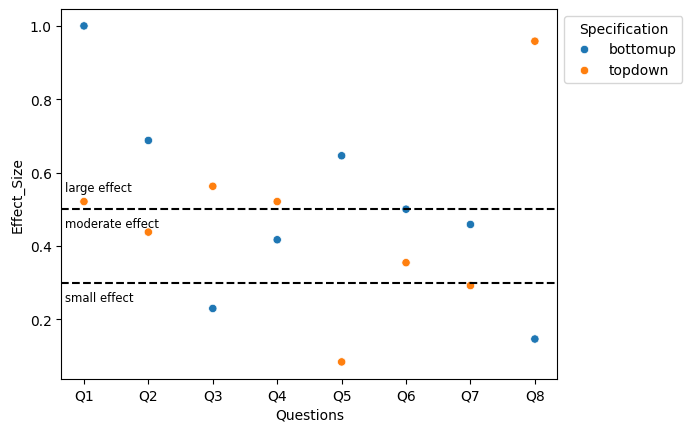

In [36]:
plt.axhline(y=0.3, linestyle='--', color="black")
plt.axhline(y=0.5, linestyle='--', color="black")
plt.text(x=-0.3, y=0.25, s="small effect", fontsize="small")
plt.text(x=-0.3, y=0.45, s="moderate effect", fontsize="small")
plt.text(x=-0.3, y=0.55, s="large effect", fontsize="small")
p = sns.scatterplot(data=total_df, x="Questions", y="Effect_Size", hue="Specification")
sns.move_legend(p, "upper left", bbox_to_anchor=(1, 1))